In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds2014 = pd.read_csv("dataset/2014_Financial_Data.csv")
ds2015 = pd.read_csv("dataset/2015_Financial_Data.csv")
ds2016 = pd.read_csv("dataset/2016_Financial_Data.csv")
ds2017 = pd.read_csv("dataset/2017_Financial_Data.csv")
ds2018 = pd.read_csv("dataset/2018_Financial_Data.csv")
print(ds2014.shape, ds2015.shape, ds2016.shape, ds2017.shape, ds2018.shape)

(3808, 225) (4120, 225) (4797, 225) (4960, 225) (4392, 225)


### Check if we have some NaN values

In [3]:
ds2014.dropna(how='all', inplace=True)
ds2015.dropna(how='all', inplace=True)
ds2016.dropna(how='all', inplace=True)
ds2017.dropna(how='all', inplace=True)
ds2018.dropna(how='all', inplace=True)

print(ds2014.shape, ds2015.shape, ds2016.shape, ds2017.shape, ds2018.shape)

(3808, 225) (4120, 225) (4797, 225) (4960, 225) (4392, 225)


In [4]:
print(ds2014.info())
print(ds2014.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 3807
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 6.6+ MB
None
            Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  3.764000e+03     3572.000000     3.734000e+03  3.756000e+03   
mean   5.879050e+09       12.954244     3.700973e+09  2.188214e+09   
std    3.901741e+10      705.605473     3.040688e+10  1.159028e+10   
min   -6.276160e+08       -1.773200    -5.455740e+08 -1.105000e+09   
25%    5.788880e+07       -0.002350     3.135714e+06  3.092900e+07   
50%    4.349010e+08        0.061850     1.414420e+08  1.908760e+08   
75%    2.393625e+09        0.188875     1.199844e+09  8.922534e+08   
max    1.824698e+12    42138.663900     1.537249e+12  4.621600e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  3.672000e+03  3.749000e+03        3.745000e+03      3.753000e+03   
mean   9.401830e+07  9.307406e+08 

/Users/josip/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


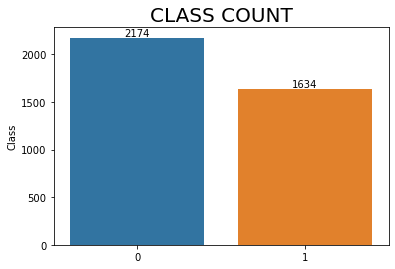

In [5]:
# Plot class distribution
df_class = ds2014['Class'].value_counts()
plotClass = sns.barplot(np.arange(len(df_class)), df_class)
plotClass.bar_label(plotClass.containers[0])
plt.title('CLASS COUNT', fontsize=20)
plt.show()

Because of the classes we can see which ones are buy-worthy and which not. So 2174 are not buy-worthy since "Class" = 0, and the other 1634 are "Class = 1".

/Users/josip/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


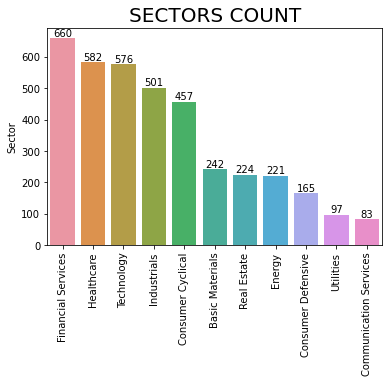

In [6]:
# Plot sector distribution
df_sector = ds2014['Sector'].value_counts()
plotSector = sns.barplot(np.arange(len(df_sector)), df_sector)
plotSector.bar_label(plotSector.containers[0])
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

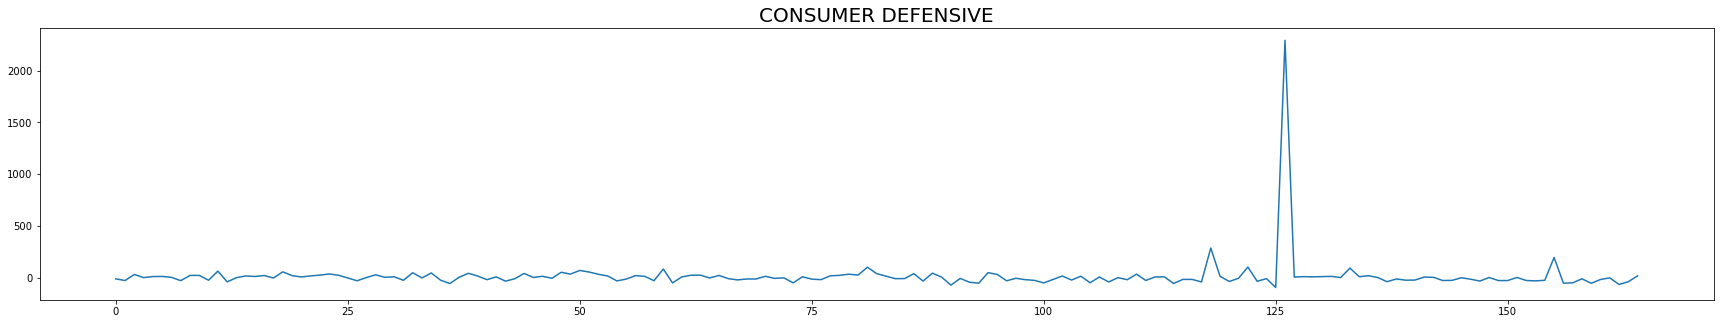

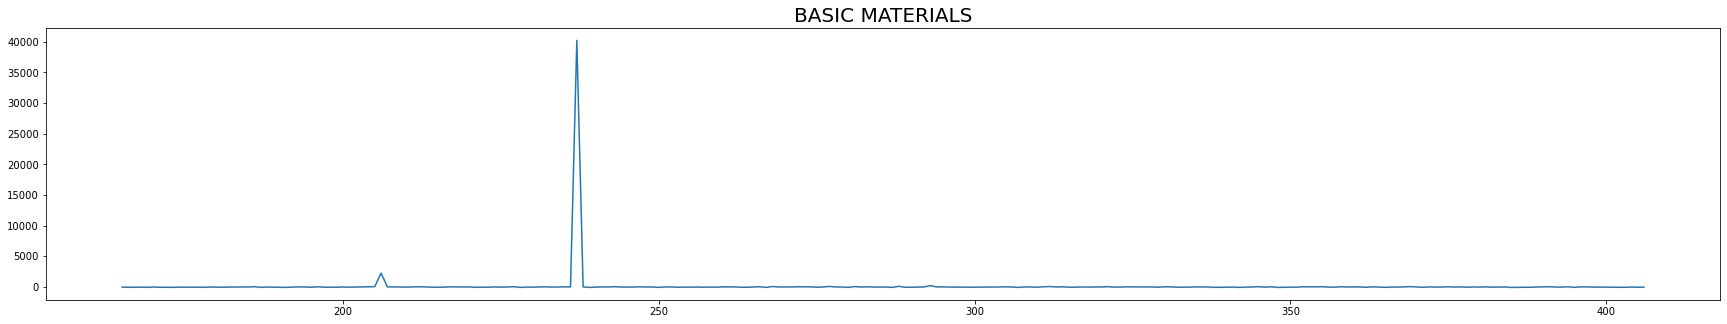

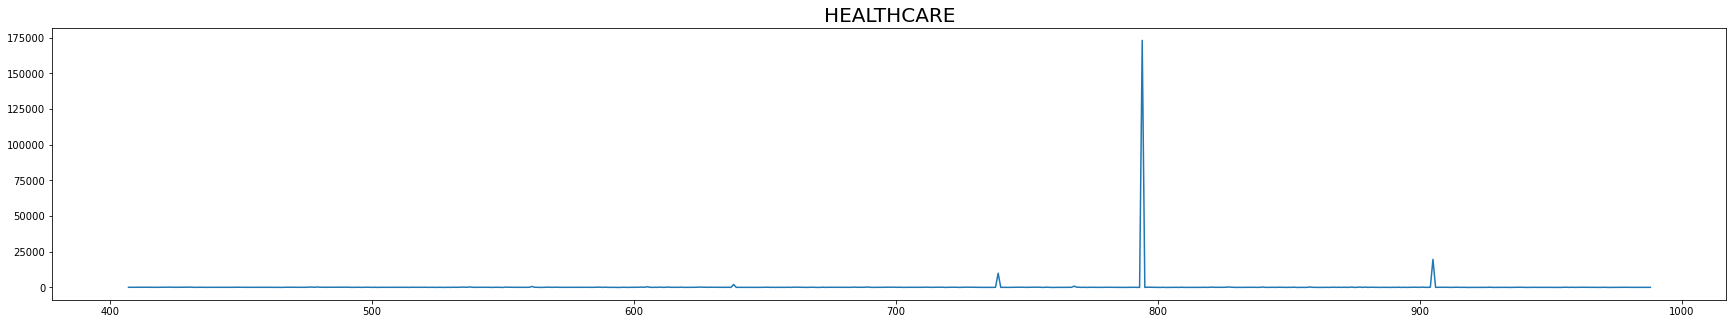

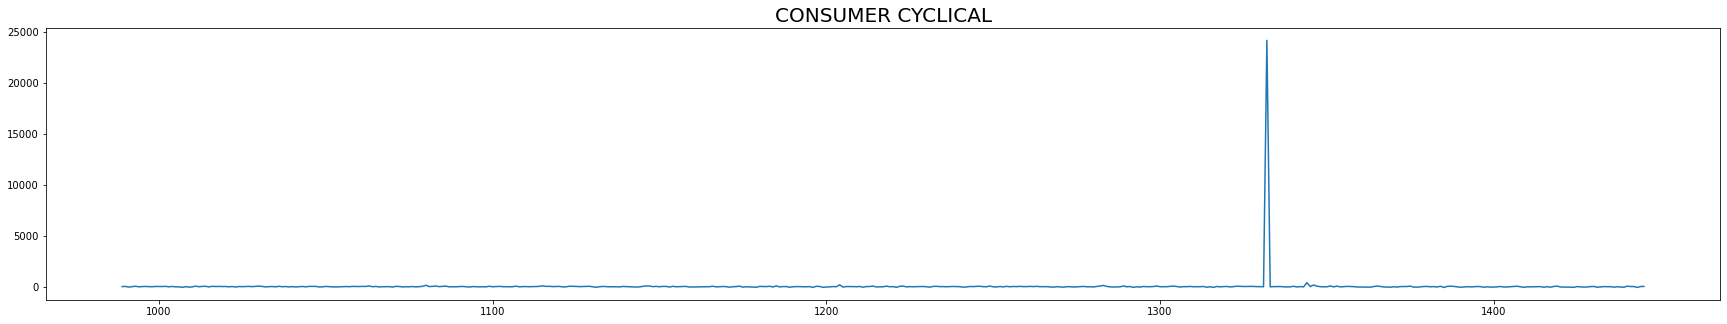

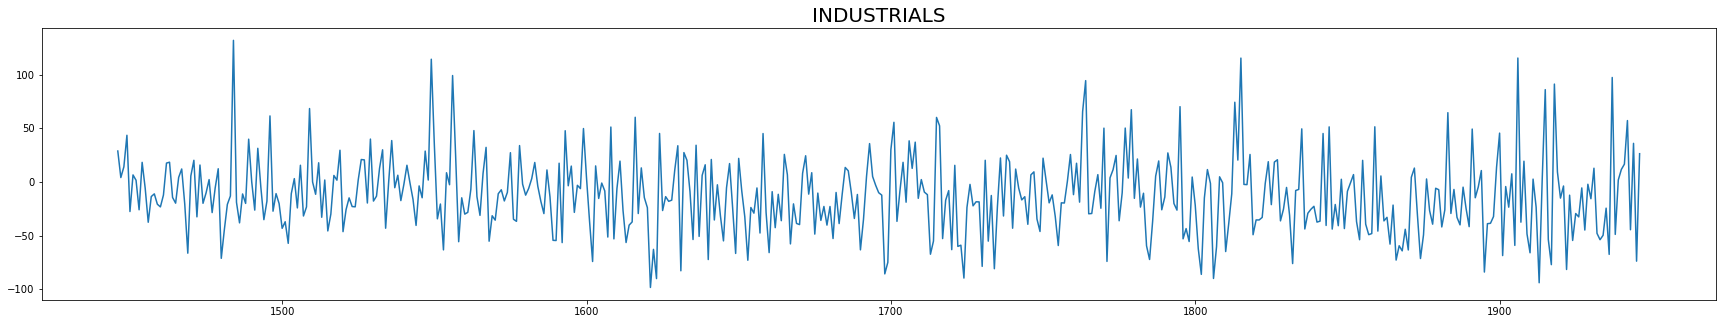

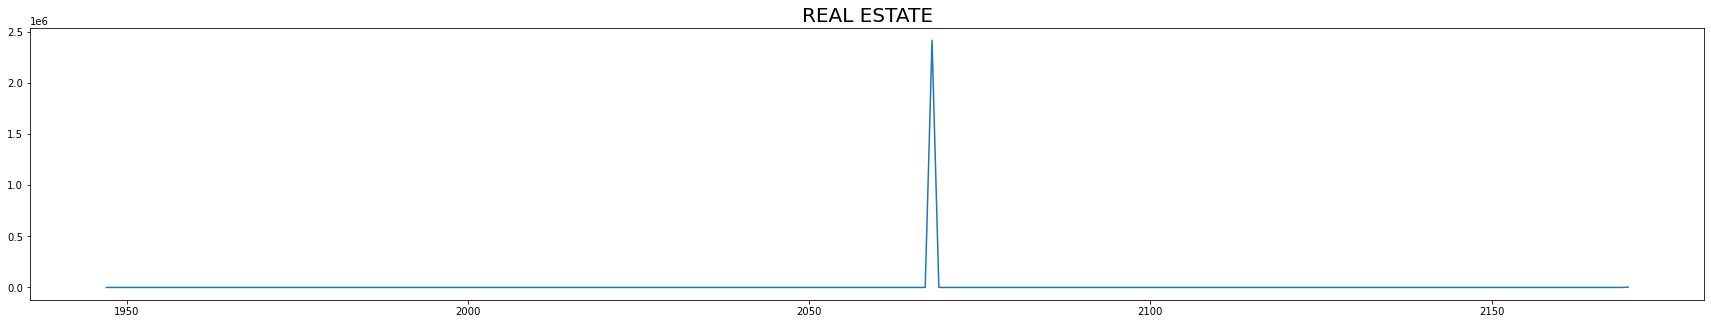

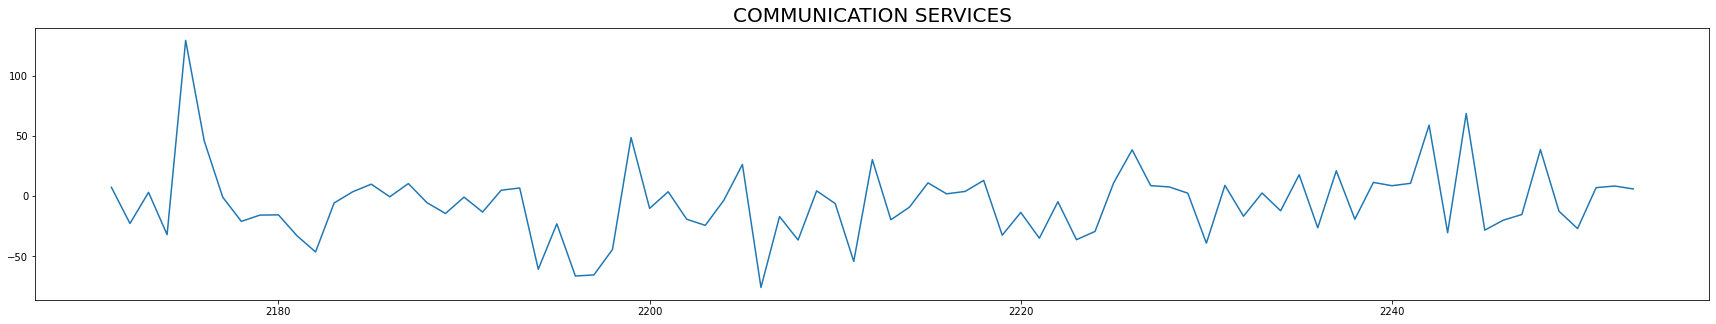

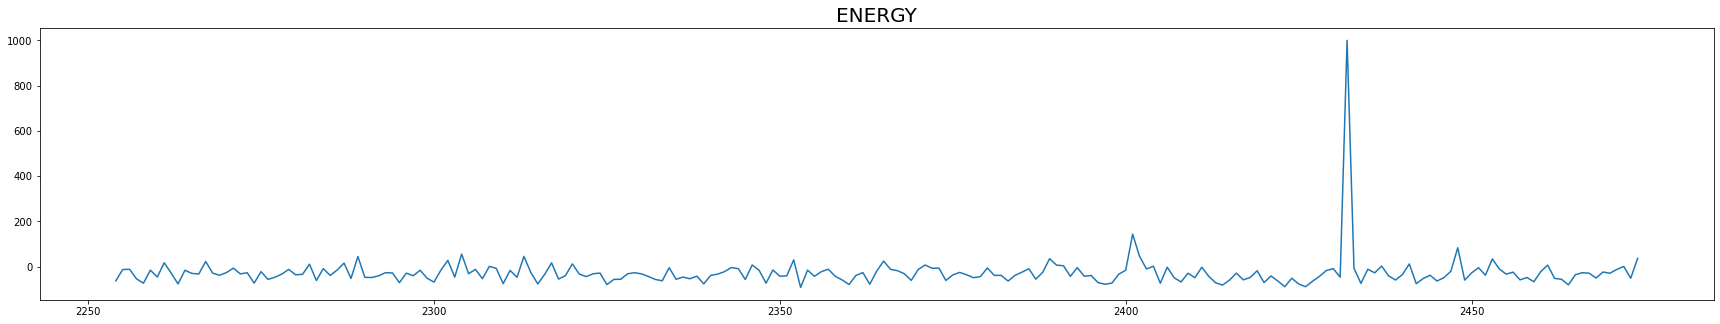

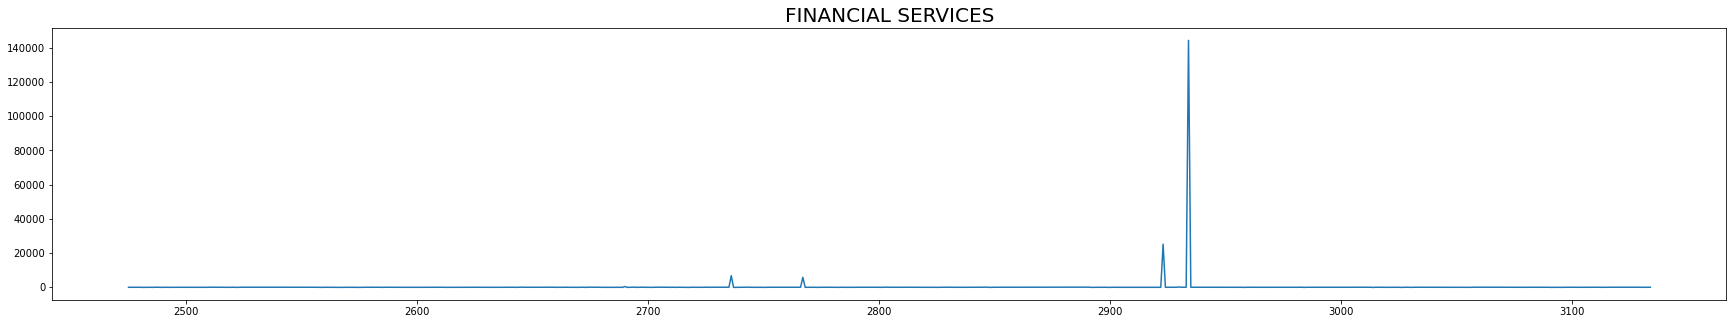

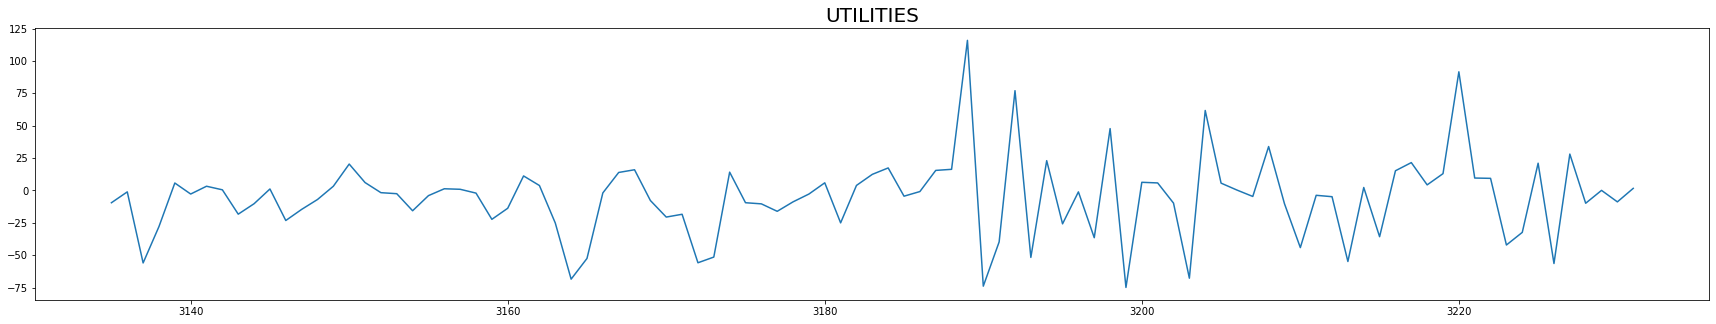

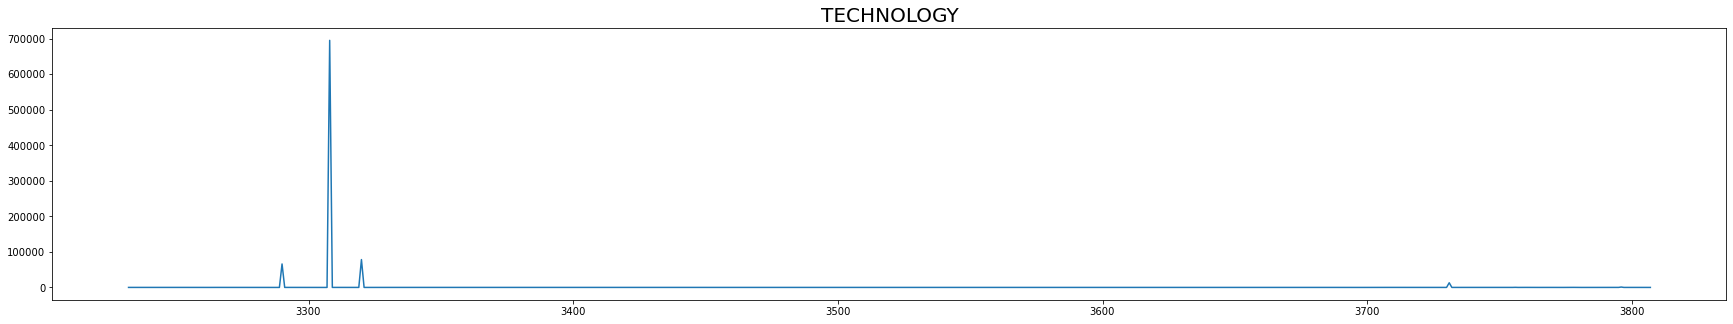

In [8]:
dfp = ds2014.loc[:, ['Sector', '2015 PRICE VAR [%]']]
sector_list = dfp["Sector"].unique()
for sector in sector_list:

    temp = dfp[dfp['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2015 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [ ]:
arr = []
for i in range(len(list(ds2014))):
    ds2014.rename(columns={list(ds2014)[i]: list(ds2014)[i].lower()}, inplace=True)
    ds2015.rename(columns={list(ds2015)[i]: list(ds2015)[i].lower()}, inplace=True)
    ds2016.rename(columns={list(ds2016)[i]: list(ds2016)[i].lower()}, inplace=True)
    ds2017.rename(columns={list(ds2017)[i]: list(ds2017)[i].lower()}, inplace=True)
    ds2018.rename(columns={list(ds2018)[i]: list(ds2018)[i].lower()}, inplace=True)


In [ ]:
arr = []
for i in list(ds2014):
    if i in list(ds2015) and i in list(ds2016) and i in list(ds2017) and i in list(ds2018):
        arr.append(i)
    else: print(i)
print(len(arr))

### looking for missing values and how to handle them

In [37]:
# Drop columns relative to classification, we will use them later
class_data = ds2014.loc[:, ['Class', '2015 PRICE VAR [%]']]
ds2014.drop(['Class', '2015 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = ds2014.isna().sum()
zero_vals = ds2014.isin([0]).sum()
ind = np.arange(ds2014.shape[1])

plt.figure(figsize=(50,20))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

KeyError: "None of [Index(['Class', '2015 PRICE VAR [%]'], dtype='object')] are in the [columns]"

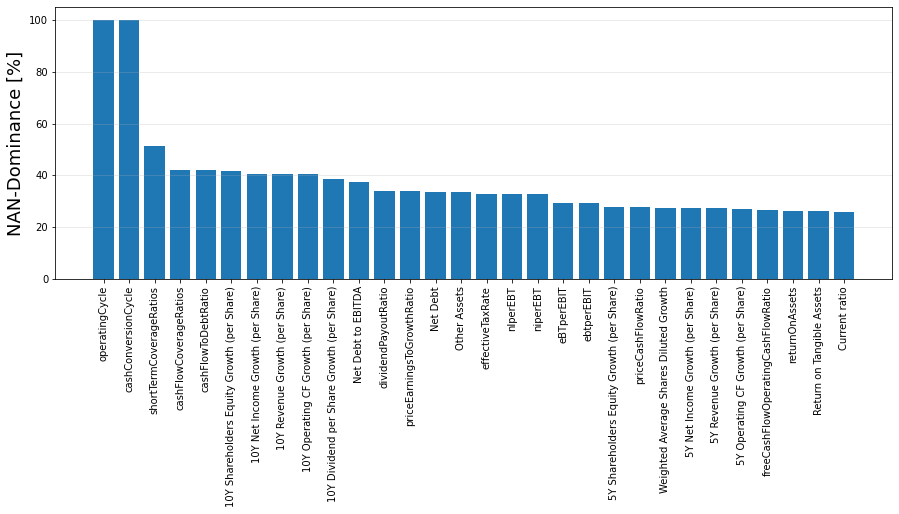

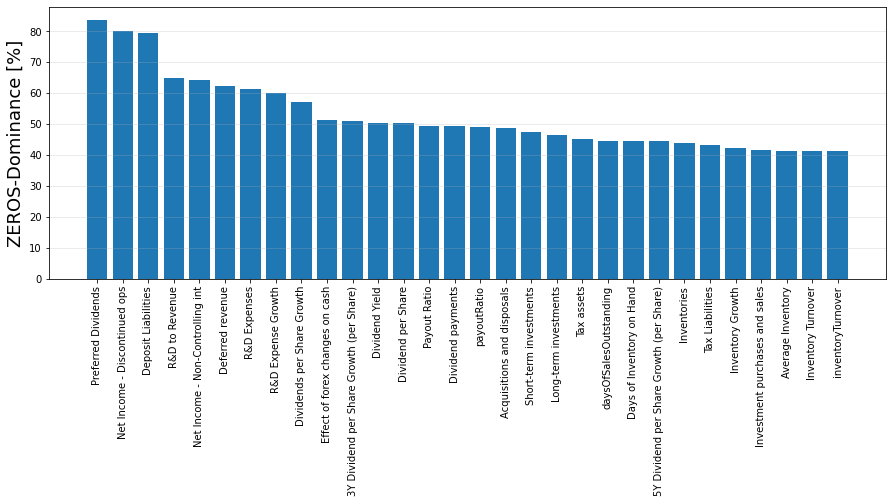

In [20]:
# Find count and percent of nan-values, zero-values
total_nans = ds2014.isnull().sum().sort_values(ascending=False)
percent_nans = (ds2014.isnull().sum()/ds2014.isnull().count() * 100).sort_values(ascending=False)
total_zeros = ds2014.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (ds2014.isin([0]).sum()/ds2014.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [21]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      232.000000
Percent NaN      6.092437
Name: 0.5, dtype: float64
Total Zeros      281.80000
Percent Zeros      7.40021
Name: 0.6, dtype: float64


In [22]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {ds2014.shape[1]}')
print()

df_test1 = ds2014.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {df_test1.shape[1]}')
print()

df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {df_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 223

NUMBER OF VARIABLES AFTER NaN THRESHOLD 6.09%: 114

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 7.40%: 63


/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_22632/2354747668.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test1 = ds2014.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1)
/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_22632/2354747668.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test2 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)


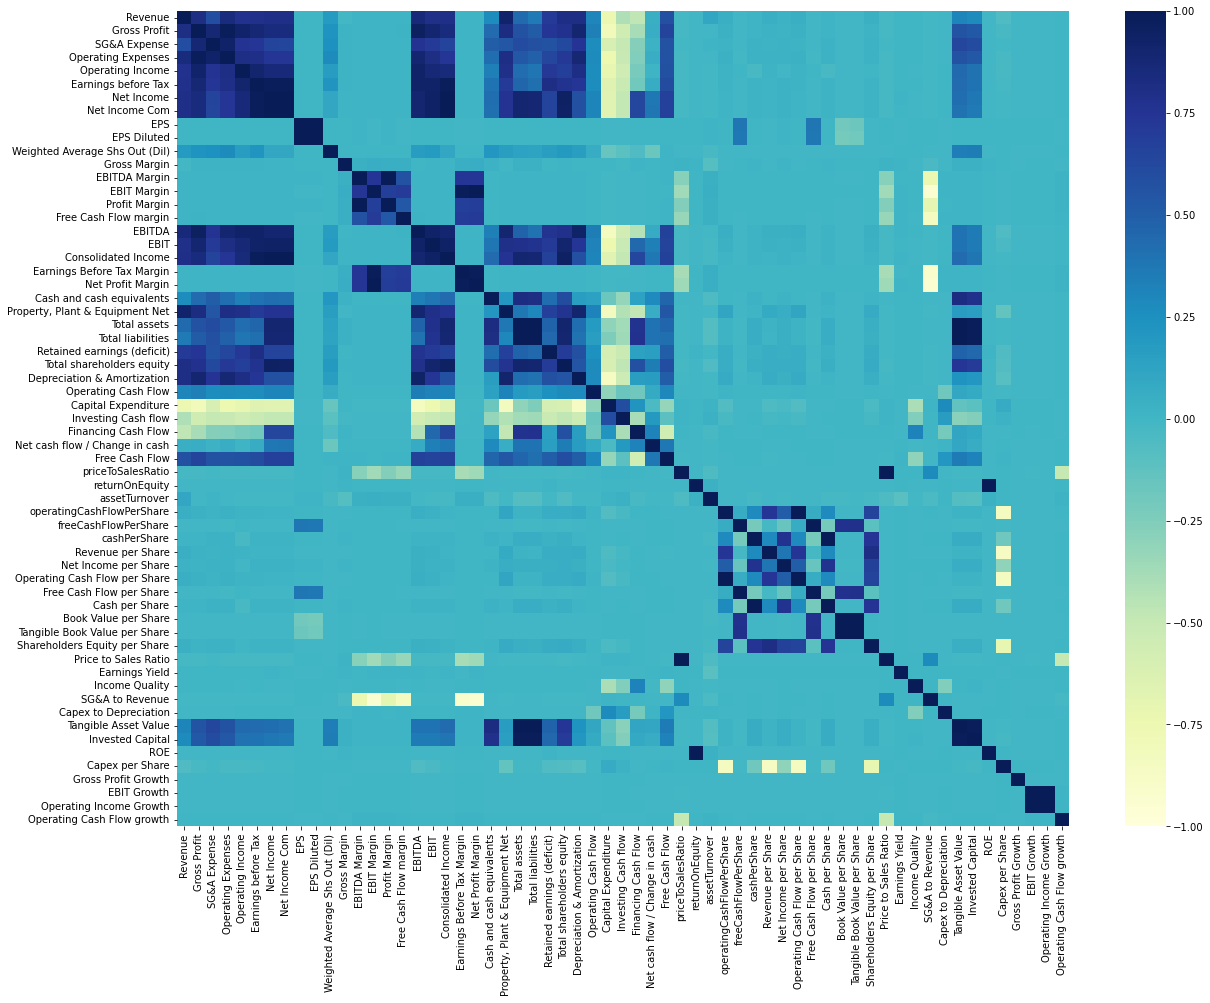

In [23]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

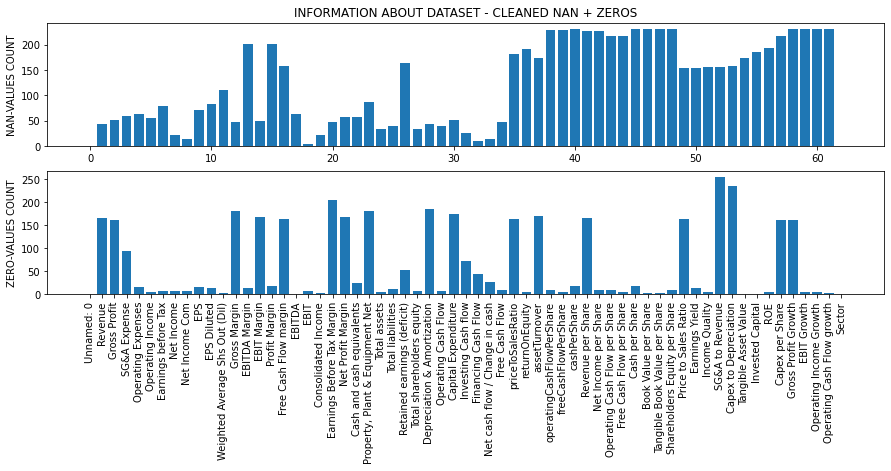

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.title('INFORMATION ABOUT DATASET - CLEANED NAN + ZEROS', fontsize=12)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isnull().sum())
plt.ylabel('NAN-VALUES COUNT', fontsize=10)

plt.subplot(2,1,2)
plt.bar(np.arange(df_test2.shape[1]), df_test2.isin([0]).sum())
plt.ylabel('ZERO-VALUES COUNT', fontsize=10)
plt.xticks(np.arange(df_test2.shape[1]), df_test2.columns.values, rotation='90')

plt.show()

In [32]:
df_test2.describe()

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,SG&A to Revenue,Capex to Depreciation,Tangible Asset Value,Invested Capital,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Operating Cash Flow growth
count,3.764000e+03,3.756000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.728000e+03,3.785000e+03,3.793000e+03,3736.000000,3724.000000,...,3652.000000,3650.000000,3.635000e+03,3.623000e+03,3615.000000,3590.000000,3577.000000,3577.000000,3577.000000,3576.000000
mean,3.631836e+09,1.379556e+09,5.709725e+08,9.044227e+08,4.280910e+08,3.712154e+08,2.744505e+08,2.705745e+08,0.322017,0.280749,...,0.404513,-1.470916,6.734238e+09,7.119573e+09,0.011308,-2.727329,0.188531,0.076806,0.041846,0.011547
std,8.309966e+09,3.201836e+09,1.359502e+09,2.108804e+09,1.012589e+09,9.097473e+08,6.835705e+08,6.782661e+08,4.269613,4.273307,...,0.642407,1.831133,1.651658e+10,1.741692e+10,0.366330,6.439817,0.506878,1.330402,1.214727,1.313943
min,0.000000e+00,0.000000e+00,8.566336e+05,3.807730e+06,-9.794258e+07,-1.358065e+08,-1.393145e+08,-1.464653e+08,-17.368800,-17.438440,...,0.000000,-8.715825,9.809589e+06,-1.956156e+06,-1.272492,-32.887286,-0.577640,-3.746408,-3.762590,-4.115762
25%,5.788880e+07,3.092900e+07,1.548900e+07,3.106600e+07,-1.308000e+06,-3.732902e+06,-3.693000e+06,-4.369000e+06,-0.230000,-0.240000,...,0.092750,-1.672250,1.636885e+08,8.476944e+07,-0.020750,-1.807475,-0.010200,-0.269800,-0.254500,-0.328700
50%,4.349010e+08,1.908760e+08,7.381800e+07,1.386610e+08,4.104400e+07,2.842700e+07,2.223100e+07,2.101400e+07,0.770000,0.750000,...,0.222850,-0.917450,8.500508e+08,7.837860e+08,0.078000,-0.484850,0.072200,0.065500,0.061000,0.007350
75%,2.393625e+09,8.922534e+08,3.510000e+08,5.885100e+08,2.712980e+08,2.193835e+08,1.658440e+08,1.630900e+08,2.030000,2.000000,...,0.461800,-0.449300,3.896543e+09,4.159895e+09,0.153200,-0.096650,0.225700,0.406100,0.353700,0.341450
max,3.983140e+10,1.537412e+10,6.602345e+09,1.028662e+10,4.685904e+09,4.176602e+09,3.136854e+09,3.111118e+09,7.458050,7.301922,...,3.425056,0.000000,8.178178e+10,8.538366e+10,0.782835,0.000000,2.250028,4.177370,3.606899,3.946925


In [33]:
# Cut outliers
top_quantiles = df_test2.quantile(0.97)
outliers_top = (df_test2 > top_quantiles)

low_quantiles = df_test2.quantile(0.03)
outliers_low = (df_test2 < low_quantiles)

df_test2 = df_test2.mask(outliers_top, top_quantiles, axis=1)
df_test2 = df_test2.mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
df_test2.describe()

/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_22632/642270382.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_top = (df_test2 > top_quantiles)
/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_22632/642270382.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_low = (df_test2 < low_quantiles)


,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,SG&A to Revenue,Capex to Depreciation,Tangible Asset Value,Invested Capital,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Operating Cash Flow growth
count,3.764000e+03,3.756000e+03,3.749000e+03,3.745000e+03,3.753000e+03,3.728000e+03,3.785000e+03,3.793000e+03,3736.000000,3724.000000,...,3652.000000,3650.000000,3.635000e+03,3.623000e+03,3615.000000,3590.000000,3577.000000,3577.000000,3577.000000,3576.000000
mean,3.631798e+09,1.379554e+09,5.708609e+08,9.024182e+08,4.280443e+08,3.712155e+08,2.743464e+08,2.705503e+08,0.322426,0.281507,...,0.404099,-1.470594,6.731945e+09,7.118666e+09,0.011340,-2.726499,0.188487,0.076494,0.041356,0.011699
std,8.309803e+09,3.201826e+09,1.359005e+09,2.099894e+09,1.012382e+09,9.097455e+08,6.830752e+08,6.781583e+08,4.267757,4.269934,...,0.640459,1.829860,1.650616e+10,1.741284e+10,0.366200,6.435929,0.506642,1.328719,1.212655,1.313455
min,0.000000e+00,0.000000e+00,8.633948e+05,3.814536e+06,-9.786778e+07,-1.357923e+08,-1.389019e+08,-1.464187e+08,-17.354360,-17.411916,...,0.000000,-8.705144,9.809682e+06,-1.955393e+06,-1.271319,-32.859691,-0.577321,-3.742402,-3.759121,-4.110672
25%,5.788880e+07,3.092900e+07,1.548900e+07,3.106600e+07,-1.308000e+06,-3.732902e+06,-3.693000e+06,-4.369000e+06,-0.230000,-0.240000,...,0.092750,-1.672250,1.636885e+08,8.476944e+07,-0.020750,-1.807475,-0.010200,-0.269800,-0.254500,-0.328700
50%,4.349010e+08,1.908760e+08,7.381800e+07,1.386610e+08,4.104400e+07,2.842700e+07,2.223100e+07,2.101400e+07,0.770000,0.750000,...,0.222850,-0.917450,8.500508e+08,7.837860e+08,0.078000,-0.484850,0.072200,0.065500,0.061000,0.007350
75%,2.393625e+09,8.922534e+08,3.510000e+08,5.885100e+08,2.712980e+08,2.193835e+08,1.658440e+08,1.630900e+08,2.030000,2.000000,...,0.461800,-0.449300,3.896543e+09,4.159895e+09,0.153200,-0.096650,0.225700,0.406100,0.353700,0.341450
max,3.983015e+10,1.537404e+10,6.598635e+09,1.022018e+10,4.684278e+09,4.176590e+09,3.132986e+09,3.110268e+09,7.457147,7.300596,...,3.411299,0.000000,8.170600e+10,8.535353e+10,0.782737,0.000000,2.248228,4.163014,3.587187,3.946869


In [34]:
# Replace nan-values with mean value of column, considering each sector individually.
df_test2 = df_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

/var/folders/7k/9x94hbs904jgh5ymqv00n1rh0000gn/T/ipykernel_22632/1188400666.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df_test2 = df_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))


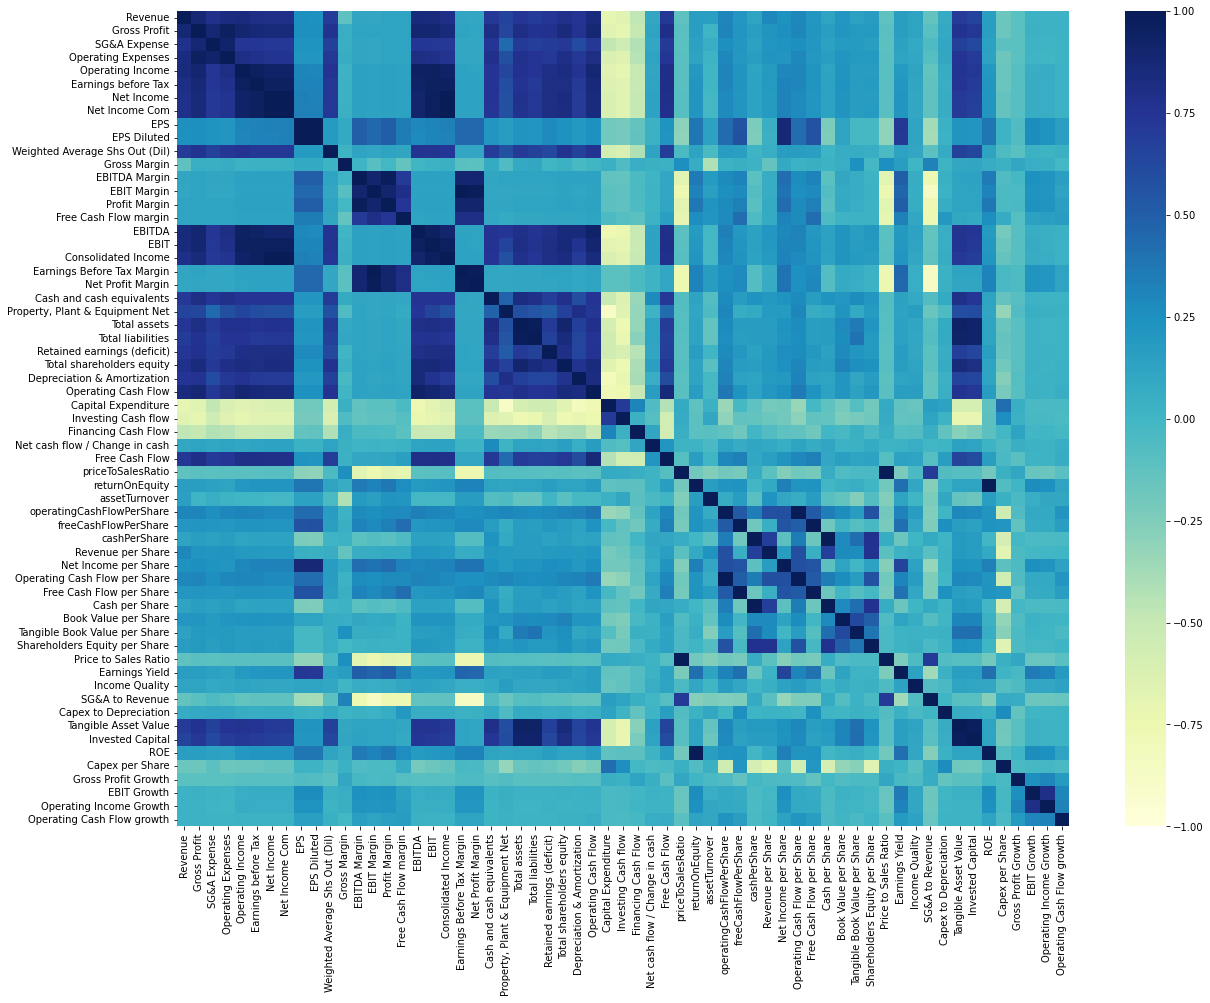

In [36]:
# Plot correlation matrix of output dataset
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

In [38]:
# Add the sector column
df_out = df_test2.join(ds2014['Sector'])

# Add back the classification columns
df_out = df_out.join(class_data)

# Print information about dataset
df_out.info()
df_out.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 3807
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Revenue                          3808 non-null   float64
 1   Gross Profit                     3808 non-null   float64
 2   SG&A Expense                     3808 non-null   float64
 3   Operating Expenses               3808 non-null   float64
 4   Operating Income                 3808 non-null   float64
 5   Earnings before Tax              3808 non-null   float64
 6   Net Income                       3808 non-null   float64
 7   Net Income Com                   3808 non-null   float64
 8   EPS                              3808 non-null   float64
 9   EPS Diluted                      3808 non-null   float64
 10  Weighted Average Shs Out (Dil)   3808 non-null   float64
 11  Gross Margin                     3808 non-null   float64
 12  EBITDA Margin       

,Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,EPS Diluted,...,Tangible Asset Value,Invested Capital,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Operating Cash Flow growth,Class,2015 PRICE VAR [%]
count,3.808000e+03,3.808000e+03,3.808000e+03,3.808000e+03,3.808000e+03,3.808000e+03,3.808000e+03,3.808000e+03,3808.000000,3808.000000,...,3.808000e+03,3.808000e+03,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3.808000e+03
mean,3.629438e+09,1.383268e+09,5.734509e+08,9.054038e+08,4.303555e+08,3.737322e+08,2.746230e+08,2.707246e+08,0.332270,0.295166,...,6.856765e+09,7.252059e+09,0.012811,-2.757242,0.188291,0.079133,0.043347,0.012386,0.429097,9.751560e+02
std,8.263071e+09,3.181526e+09,1.349218e+09,2.083803e+09,1.005552e+09,9.008314e+08,6.811086e+08,6.768939e+08,4.232060,4.228103,...,1.617939e+10,1.704775e+10,0.357407,6.284690,0.491399,1.288818,1.176228,1.273576,0.495012,4.098461e+04
min,0.000000e+00,0.000000e+00,8.633948e+05,3.814536e+06,-9.786778e+07,-1.357923e+08,-1.389019e+08,-1.464187e+08,-17.354360,-17.411916,...,9.809682e+06,-1.955393e+06,-1.271319,-32.859691,-0.577321,-3.742402,-3.759121,-4.110672,0.000000,-1.003972e+02
25%,5.905700e+07,3.183953e+07,1.576025e+07,3.182500e+07,-9.695000e+05,-3.101770e+06,-3.531115e+06,-4.337080e+06,-0.210000,-0.212500,...,1.802195e+08,9.949425e+07,-0.017125,-2.037600,-0.003225,-0.249650,-0.233200,-0.304250,0.000000,-2.857143e+01
50%,4.564960e+08,1.996840e+08,7.793300e+07,1.442295e+08,4.425100e+07,3.138850e+07,2.300700e+07,2.179650e+07,0.785000,0.770000,...,9.859365e+08,9.339170e+08,0.079050,-0.559900,0.083100,0.078600,0.068550,0.011150,0.000000,-5.281842e+00
75%,2.487808e+09,9.401458e+08,3.794750e+08,6.183929e+08,2.914665e+08,2.442320e+08,1.708450e+08,1.652170e+08,2.010000,1.970000,...,4.537768e+09,4.960283e+09,0.145075,-0.114750,0.228575,0.375725,0.320000,0.299025,1.000000,1.331484e+01
max,3.983015e+10,1.537404e+10,6.598635e+09,1.022018e+10,4.684278e+09,4.176590e+09,3.132986e+09,3.110268e+09,7.457147,7.300596,...,8.170600e+10,8.535353e+10,0.782737,0.000000,2.248228,4.163014,3.587187,3.946869,1.000000,2.418601e+06
